#  Analisi preliminari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Read file excel

In [ ]:
df = pd.read_csv('../Data/diabetes_train.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,73.000000,0,0,former,27.320000,8.800000,300.000000,1.874574,8196.000000,51.907693,1
1,Female,54.791161,0,0,never,33.886115,4.206372,133.258655,0.264573,4443.949514,61.987489,1
2,Male,71.625296,0,0,No Info,27.334942,8.764138,298.804605,1.927612,8167.525687,51.776353,1
3,Male,64.860037,0,0,never,27.157262,6.503817,159.567388,1.388626,4329.812897,43.721297,1
4,Female,54.753378,0,0,never,40.090237,6.272635,300.000000,0.601001,12027.071071,54.576024,1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Female,49.000000,0,0,never,26.880000,5.000000,130.000000,NaN,3494.400000,37.433717,0
144,Female,54.000000,0,0,never,27.320000,5.700000,100.000000,0.439735,2732.000000,57.341251,0
145,Female,37.000000,0,0,No Info,27.320000,5.000000,140.000000,1.346416,3824.800000,45.839022,0
146,Female,12.029322,0,0,No Info,27.266355,4.108126,159.963686,-0.630595,4371.200000,62.910764,0


Count the number of missing values for each column

In [3]:
df.isnull().sum() # count the number of missing values for each column

gender                      0
age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
Insulin_Sensitivity_Est    26
BMI_Glucose_Interaction     0
Random_Lab_Marker           0
diabetes                    0
dtype: int64

In [4]:
print(df.describe())
print(df.describe(include='object'))

              age  hypertension  heart_disease         bmi  HbA1c_level  \
count  148.000000    148.000000     148.000000  148.000000   148.000000   
mean    42.711916      0.060811       0.013514   27.620882     5.833681   
std     23.396599      0.239794       0.115852    6.585863     1.223741   
min     -1.436491      0.000000       0.000000   13.660000     3.500000   
25%     20.354995      0.000000       0.000000   23.975003     5.000000   
50%     47.323323      0.000000       0.000000   27.320000     6.000000   
75%     63.172916      0.000000       0.000000   30.770990     6.500000   
max     80.000000      1.000000       1.000000   48.626906     8.985758   

       blood_glucose_level  Insulin_Sensitivity_Est  BMI_Glucose_Interaction  \
count           148.000000               122.000000               148.000000   
mean            151.084823                 0.819003              4237.253128   
std              53.872904                 1.039820              2118.592968   
min 

In [5]:
# Frequenze colonne categoriali
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(df[col].value_counts().to_string())
    print()

# Frequenze colonne a dominio limitato
few_unique_cols = [col for col in df.columns if df[col].nunique() <= 5]

for col in few_unique_cols:
    print(df[col].value_counts().to_string())
    print()

gender
Female    75
Male      73

smoking_history
No Info        57
never          54
current        13
not current    11
former          9
ever            4

gender
Female    75
Male      73

hypertension
0    139
1      9

heart_disease
0    146
1      2

diabetes
0    111
1     37



In [6]:
print(df[df['age'] <= 1])

     gender       age  hypertension  heart_disease smoking_history        bmi  \
117    Male -1.436491             0              0         No Info  16.735854   
141  Female  0.400000             0              0         No Info  13.660000   
147  Female  0.560000             0              0         No Info  16.270000   

     HbA1c_level  blood_glucose_level  Insulin_Sensitivity_Est  \
117     5.187371           125.518512                 1.655180   
141     5.800000           158.000000                -1.459413   
147     6.000000           158.000000                 0.089663   

     BMI_Glucose_Interaction  Random_Lab_Marker  diabetes  
117                  2128.14          67.142346         0  
141                  2158.28          41.921440         0  
147                  2570.66          32.823192         0  


In [7]:
print(df[df['bmi'] > 80])

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, Insulin_Sensitivity_Est, BMI_Glucose_Interaction, Random_Lab_Marker, diabetes]
Index: []


In [8]:
print(df[df['age'] <= 8]['smoking_history'].value_counts().to_string())

smoking_history
No Info    13
never       1
current     1


In [9]:
# Crea una copia del dataset
df_encoded = df.copy()

# Applica LabelEncoder a tutte le colonne categoriche
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

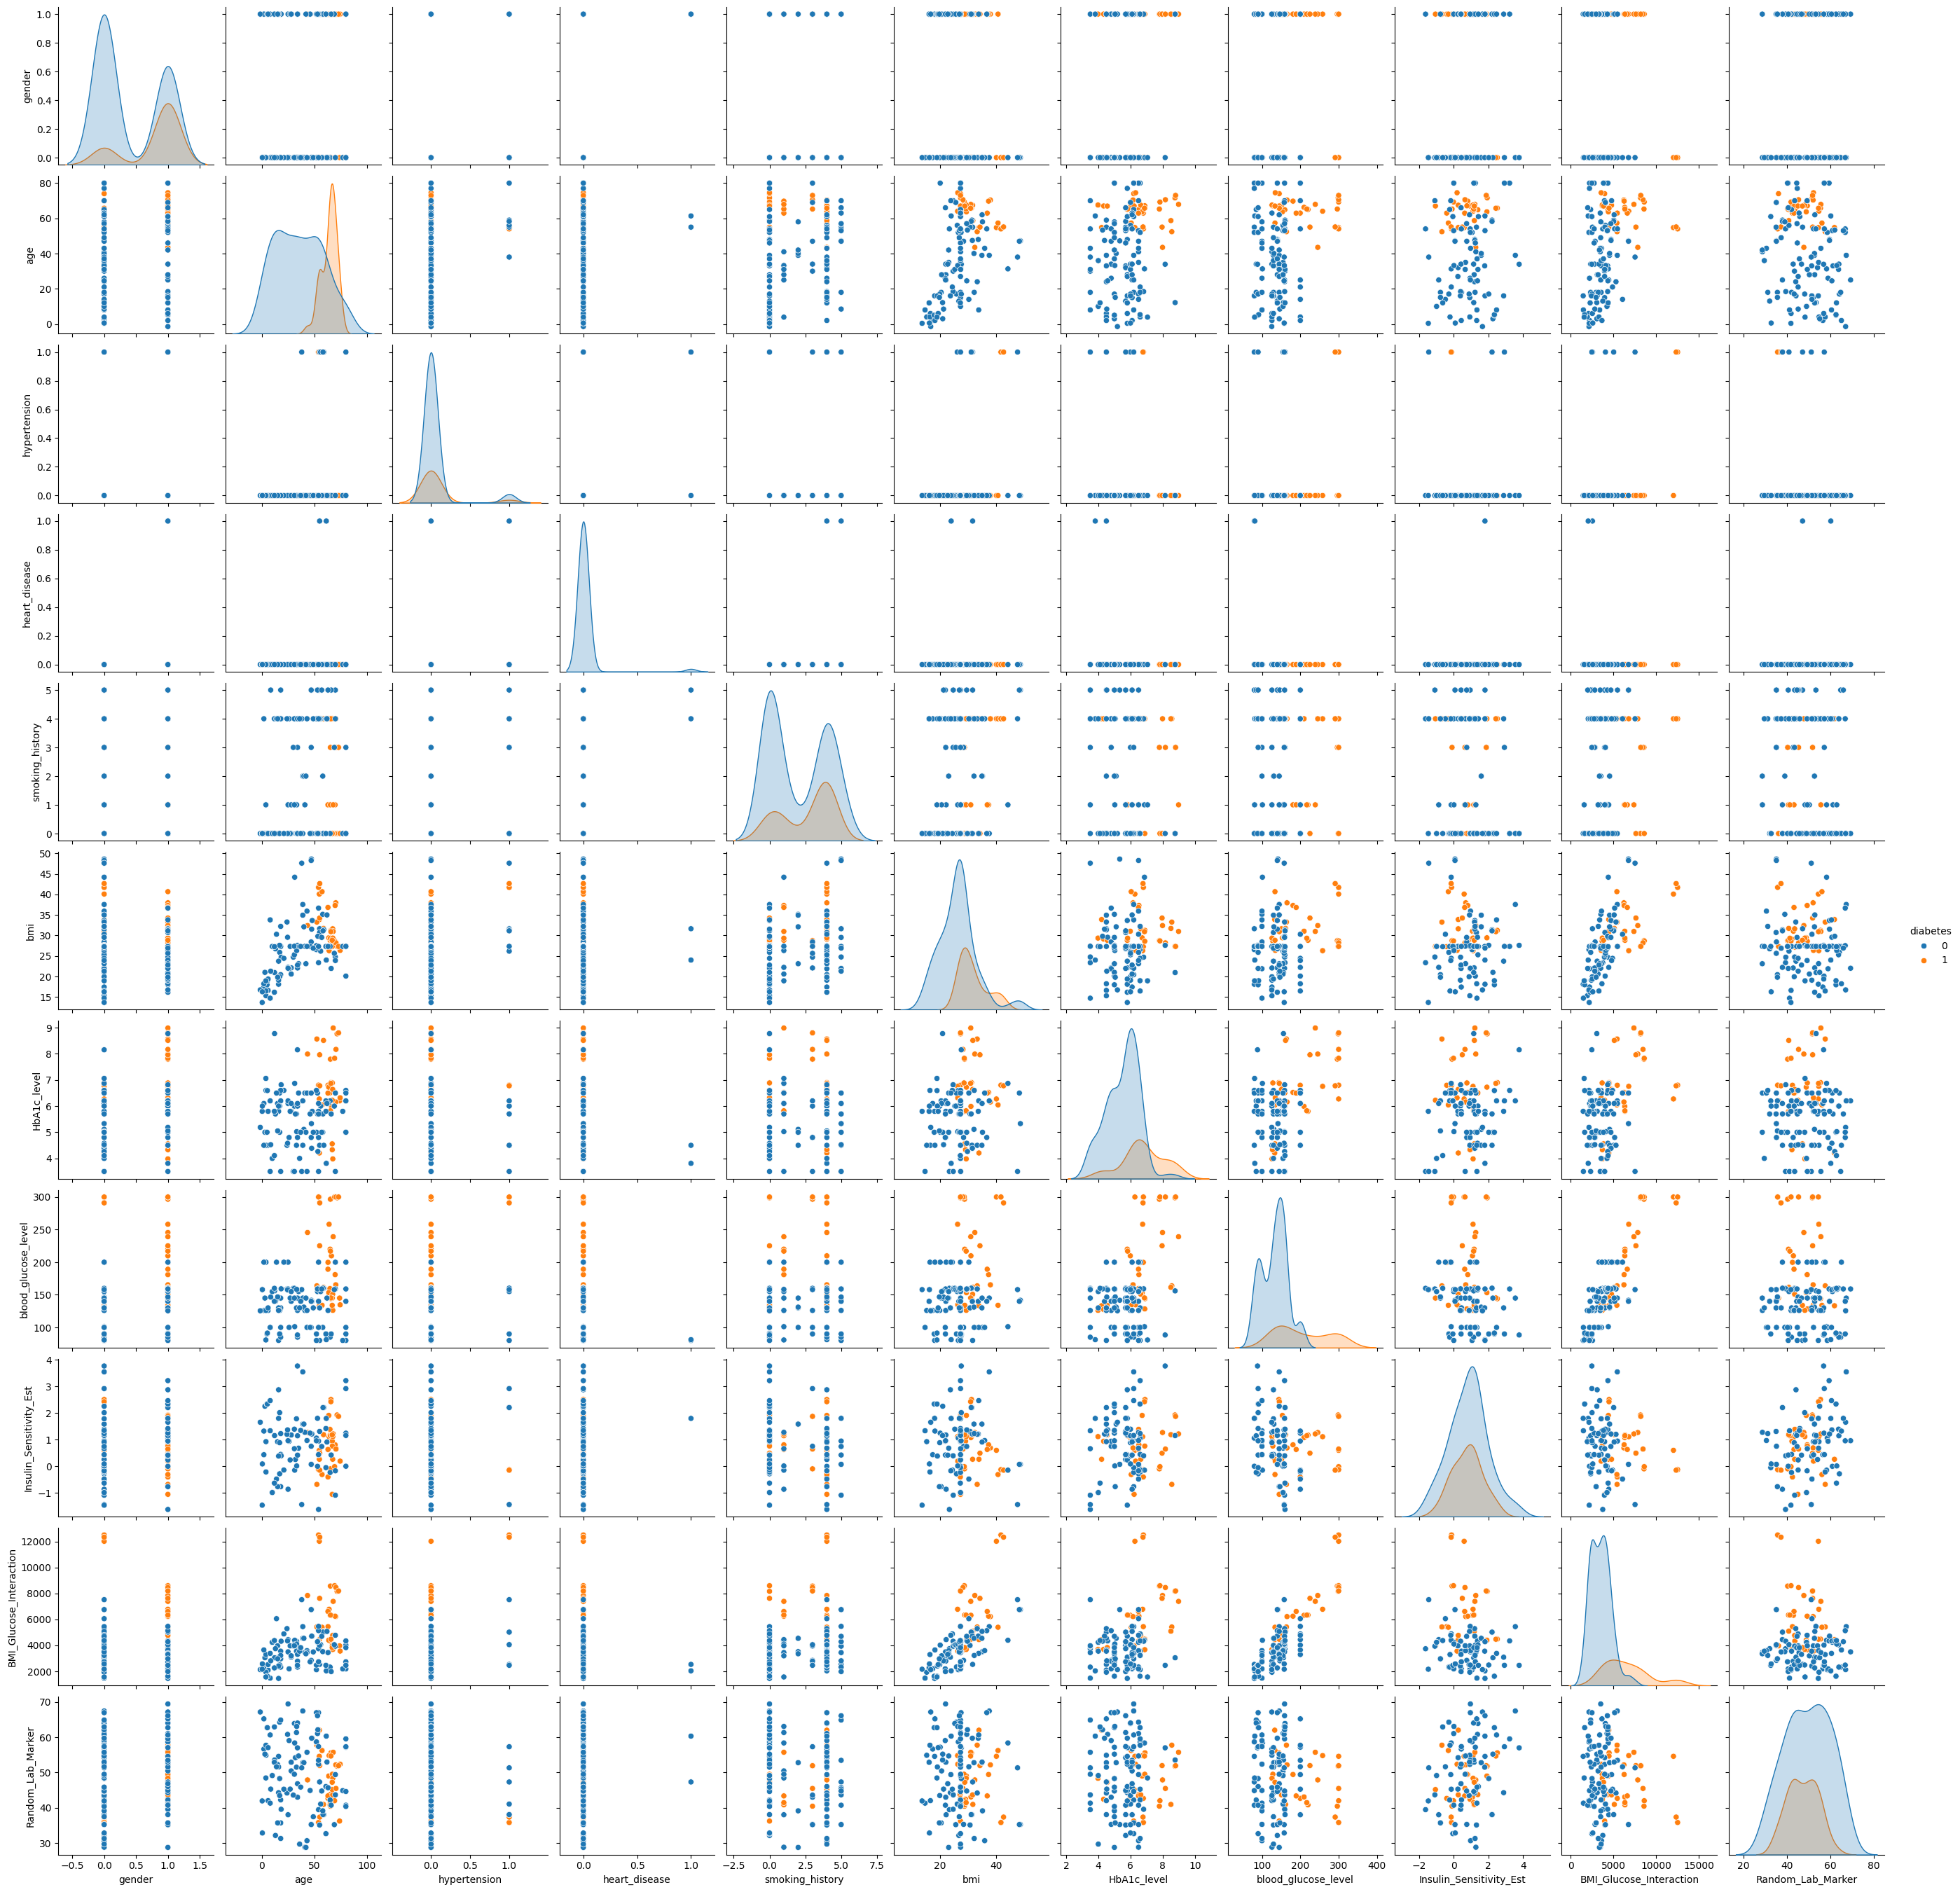

In [10]:
# Pair plot
sns.pairplot(df_encoded, hue = 'diabetes')
plt.show()